<div style="border:solid purple 2px; padding: 20px"> 

**Привет, Оксана!**

Меня зовут Мария Новожилова и я буду делать ревью твоей проектной работы по теме "Принятие решений в бизнесе". Давай будем общаться на **«ты»**. Если это неприемлемо, обязательно напиши мне в комментариях — мы перейдем на **«вы»**.

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> Так я выделяю те комментарии, на которые нужно обратить внимание в первую очередь. После их доработки проект будет принят. </div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Зеленым цветом отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах.</div>

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Оранжевым цветом выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).</div>
    
Давай работать над проектом в диалоге: если ты **что-то меняешь** в проекте по моим рекомендациям — **пиши об этом**. Выбери для своих комментариев какой-то заметный цвет.

<div class="alert alert-info">
<b>Комментарий студента:</b> Например, такой.</div>   
    
Так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее».

<div class="alert alert-success">
<b>2V Комментарий ревьюера ✔️✔️:</b> 😺 Привет! Новые комментарии отмечены 2V. 

# А/В тест в интернет-магазине и анализ теста

**Цель:** Приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

**План:**
1. Выгрузка и подготовка данных
2. Приоритезация гипотез
3. Анализ A/B-теста
4. Выводы

**Описание данных:**

1.Данные для первой части

Файл /datasets/hypothesis.csv. 

•	Hypothesis — краткое описание гипотезы; 
•	Reach — охват пользователей по 10-балльной шкале; 
•	Impact — влияние на пользователей по 10-балльной шкале; 
•	Confidence — уверенность в гипотезе по 10-балльной шкале; 
•	Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.


2.Данные для второй части

Файл /datasets/orders.csv.

•	transactionId — идентификатор заказа;
•	visitorId — идентификатор пользователя, совершившего заказ;
•	date — дата, когда был совершён заказ;
•	revenue — выручка заказа;
•	group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv.

•	date — дата;
•	group — группа A/B-теста;
•	visitors — количество пользователей в указанную дату в указанной группе A/B-теста


<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Хорошая практика начинать проект с описания контекста и задачи.

## Подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import numpy as np
import datetime as dt

from scipy import stats as st
from datetime import datetime, timedelta
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [2]:
# код для отображения 200 столбцов в датасетах
pd.options.display.max_columns = 200

In [3]:
# отображение строчек без усечений
pd.options.display.max_colwidth = 150

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> чтобы не было предупреждения, можно использовать такой код:

    pd.options.display.max_colwidth = 150

<div class="alert alert-info">
<b>Комментарий студента:</b> Привет, спасибо за наводку.</div> 

<div class="alert alert-success">
<b>2V Комментарий ревьюера ✔️✔️:</b> 😺 🤝

In [4]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Библиотеки и данные успешно загружены.

In [5]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [6]:
# наименование колонок приведем к нижнему регистру
hypothesis.columns= hypothesis.columns.str.lower()

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> 👍 </div>

In [7]:
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [9]:
# переименуем назания столбцов
orders = orders.rename(columns = {'transactionId': 'transaction_id', 'visitorId': 'visitor_id'})
orders

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [10]:
# проверка на дубликаты
orders.duplicated().sum()

0

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> 👍 </div>

In [11]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [12]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [13]:
visitors.duplicated().sum()

0

In [14]:
# приводим данные к необходимому формату
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d')) 

orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

**Вывод:** 
Выгрузили 3 датасета, проверили на дубликаты, переименовали названия колонок для удобства, преобразовали тип данных, где это было необходимо. Пропусков не обнаружено. 

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> 👍 всё верно </div> 

## Приоритизация гипотез.

In [15]:
# считаем ICE для гипотез и сортируем по убыванию ICE
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence']/hypothesis['efforts']
hypothesis.loc[:,['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


In [16]:
# считаем RICE для гипотез и сортируем по убыванию RICE
hypothesis['RICE'] = hypothesis['reach']*hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']
hypothesis.loc[:,['hypothesis', 'ICE','RICE']].sort_values(by=['RICE', 'ICE'], ascending=False)

,hypothesis,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000,3.0


Вывод:
- по критерию ICE  впереди гипотезы: 8(Запустить акцию, дающую скидку на товар в день рождения),0(Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей),7(Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок). Влияние и уверенность в этих гипотезах высокие, а затраты средние.
- по критерию RICE на первых местах гипотезы: 7(Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок),2(Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа),0(Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей). На гипотезы 7,2 повлиял показатель охват пользователей. Гипотеза 7 имеет максимальный балл охвата, то есть она захватит большинство людей. 

На основании этих критериев в проиоритете гипотезы 
7(Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок),
0(Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей).

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> 

Можно вывести результаты двух фреймворков вместе, чтобы оценить их значения. Также в выводах лучше привести полное название гипотез, а не только их номер - это сделает проект более информативным. Обычно выводы пишутся для коллег или руководства, и у них может быть другая нумерация гипотез или вообще гипотезы без номеров.

<div class="alert alert-info">
<b>Комментарий студента:</b> Исправлено.</div> 

<div class="alert alert-success">
<b>2V Комментарий ревьюера ✔️✔️:</b> 😺 отлично, всё верно!

## Анализ A/B тестирования.

<div class="alert alert-danger">
<s><b>Комментарий ревьюера ❌:</b> Перед изучением результатов А/В теста важно проверить временной интервал теста (набора пользователей и совершения событий), а также оценить наличие пользователей в двух группах (так как большая доля пересечений искажает результаты теста). Сделай, пожалуйста, следующие проверки:
    
    - сколько у нас групп в АВ-тесте;
    - даты начала и окончания теста;
    - сколько пользователей в каждой группе - по таблице с заказами;
    - не попадают ли какие-то пользователи в обе группы (по таблице с заказами).
    

    

<div class="alert alert-info">
<b>Комментарий студента:</b> Совсем упустила это. Исправила.</div> 

### Подготовка к анализу A/B - теста.

In [17]:
visitors['group'].unique()

array(['A', 'B'], dtype=object)

У нас две группы: А,В.

<div class="alert alert-success">
<b>2V Комментарий ревьюера ✔️✔️:</b> 😺 👍

In [18]:
# посчитаем количество посетителей по группам и статистическую значимость
print('Кол-во посетителей в группе А: {}\n'
      'Кол-во посетителей в группе B: {}'.format(visitors[visitors['group']=='A']['visitors'].sum(), 
                                                 visitors[visitors['group']=='B']['visitors'].sum()))
results = st.mannwhitneyu(visitors[visitors['group']=='A']['visitors'], visitors[visitors['group']=='B']['visitors'])
alpha = 0.05

if results.pvalue < alpha:
    print('Разница в количестве посетителей в группах A и B статистически значима')
else:
    print('Разница в количестве посетителей в группах A и B статистически НЕ значима')

Кол-во посетителей в группе А: 18736
Кол-во посетителей в группе B: 18916
Разница в количестве посетителей в группах A и B статистически НЕ значима


Разница между размерами групп статистически не значима и составляет менее 1%.

<div class="alert alert-success">
<b>2V Комментарий ревьюера ✔️✔️:</b> 😺 👍

In [19]:
# посчитаем относительное изменений конверсий
first_conversion = len(orders[orders['group']=='A']) / visitors[visitors['group']=='A']['visitors'].sum() 
second_conversion = len(orders[orders['group']=='B']) / visitors[visitors['group']=='B']['visitors'].sum()
print(f'Начальная конверсия: {first_conversion:.3f}')
print(f'Полученная после изменений конверсия: {second_conversion:.3f}')
print(f'Относительное изменение конверсии после изменений: {(abs(1-(first_conversion/second_conversion))):.3f}')

Начальная конверсия: 0.030
Полученная после изменений конверсия: 0.034
Относительное изменение конверсии после изменений: 0.121


Расчитаем необходимый размер выборки расчитаем в калькуляторе: 35855. А у нас 37652. Размер выборки соответствует для корректного исследования.

<div class="alert alert-success">
<b>2V Комментарий ревьюера ✔️✔️:</b> 😺 👍

In [20]:
print('Кол-во покупок в группе A: {}'.format(len(orders[orders['group']=='A'])))
print('Кол-во покупок в группе B: {}'.format(len(orders[orders['group']=='B'])))

Кол-во покупок в группе A: 557
Кол-во покупок в группе B: 640


In [21]:
# дата начала и конца исследования
print(orders['date'].min())
print(orders['date'].max())

2019-08-01 00:00:00
2019-08-31 00:00:00


<div class="alert alert-success">
<b>2V Комментарий ревьюера ✔️✔️:</b> 😺 👍

<div class="alert alert-warning">
<b>2V Комментарий ревьюера ⚠️⚠️:</b> здесь будет также полезно посмотреть диапазон в файле visitors  и сравнить его с этим диапазоном (в нашем проекте они будут совпадать)

In [22]:
# сгруппируем данные по пользователям и группам
group_sizes = orders.groupby(['visitor_id', 'group']).size().reset_index()
group_sizes.columns = ['visitor_id', 'group', 'count']
group_sizes = group_sizes.query('count > 1').sort_values(by='visitor_id')
group_sizes

,visitor_id,group,count
45,199603092,A,4
58,237748145,A,4
63,249864742,B,3
94,366673373,A,2
104,393266494,B,2
...,...,...,...
1045,4109358064,A,2
1050,4134830387,B,2
1065,4186807279,B,2
1079,4256040402,A,7


In [23]:
#проверим какие пользователи попали сразу в две группы
duplucate = group_sizes[group_sizes['visitor_id'].duplicated()]
duplucate

,visitor_id,group,count
312,1230306981,B,2
512,2038680547,B,3
596,2378935119,B,5
619,2458001652,B,6
1080,4256040402,B,4


<div class="alert alert-warning">
<b>2V Комментарий ревьюера ⚠️⚠️:</b> На самом деле таких пользователей, которые попали в обе группы, у нас больше - 53, но это действительно некритичное количество. Проверить можно так: 
    
    # код для расчета пользователей , попавших в обе группы
    (orders.groupby('visitorId')['group'].nunique() > 1).sum()

5 пользователей попало в обе группы и во второй группе они совершили в сумме 20 заказов. Так как в рамках этого A/B теста не пользователей, а сесии разделяли на группы, то проблемы в том, что пользователь попал в обе группы, нет. Просто так вышло, что он совершил несколько сессий, которые определились в разные группы. Так же, это составляет примерно 2% от количества всех заказов.

**Вывод:** У нас две группы А и В. Разница в количестве посетителей в группах A и B статистически НЕ значима. Размер выборки соответствует для корректного исследования. Время исследования: 31 день(1 месяц).

<div class="alert alert-success">
<b>2V Комментарий ревьюера ✔️✔️:</b> 😺 👍

### Кумулятивная выручка

In [24]:
# Создадим массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 
# Соберём агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transaction_id' : pd.Series.nunique, 'visitor_id' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# агрегированные кумулятивные по дням данные о посетителях интернет-магазина:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
#Объединим обе таблицы в одну с понятными названиями столбцов:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5) 


,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> 👍 данные собраны корректно </div>

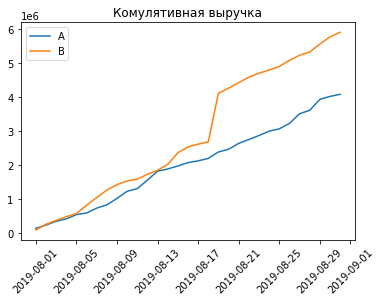

In [25]:
# графики коммулятивной выручки
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Комулятивная выручка')
plt.xticks(rotation = 45)
plt.legend() 

17-го августа сегмент В резко вырывался вперед, возможно есть аномалии в заказах.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> 👍график и интерпретация корректны </div>

### Кумулятивный средний чек

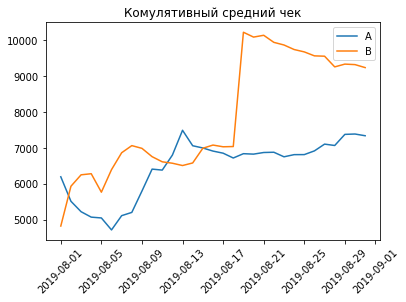

In [26]:
# графики комулятивного среднего чека
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Комулятивный средний чек')
plt.xticks(rotation = 45)
plt.legend() 

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> 👍график корректный </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> 

не хватате пояснения к этому графику

<div class="alert alert-info">
<b>Комментарий студента:</b> Я оставила его чуть ниже, что бы сразу по двум графикам.</div> 

<div class="alert alert-success">
<b>2V Комментарий ревьюера ✔️✔️:</b> 😺 👍 поняла, да, вижу

No handles with labels found to put in legend.


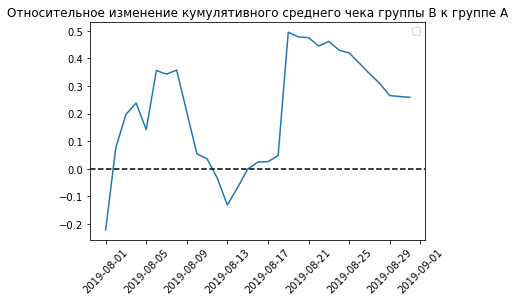

In [27]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xticks(rotation = 45)
plt.legend() 

То же самое видно и резкий рост со средним чеком. Явно есть аномально высокий чек в данную дату. А график относительного изменения так же подтверждает данную гипотезу, так как есть переломные момент 17.08.2019

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> 👍график и интерпретация корректны </div>

### Кумулятивная конверсия

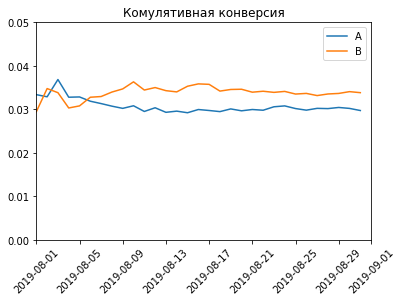

In [28]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0, 0.05])
plt.title('Комулятивная конверсия')
plt.xticks(rotation = 45)
plt.legend() 

В начале сегмент А имел чуть большую конверсию, но потом сегмент В выровнялся и зафиксровался выше значения А.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> 👍график и интерпретация корректны </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b>  без ограничения по осям этот график будет более наглядный

<div class="alert alert-info">
<b>Комментарий студента:</b> Без ограничений разрыв на 0.005 и менее, выглядит очень крупно и происходит визульный обман плюс будут шумы видны и может казаться что график не стабилизировался, а здесь мы видим чо график более менее стабильный и что разрыв не такой большой.</div> 

<div class="alert alert-success">
<b>2V Комментарий ревьюера ✔️✔️:</b> 😺 👍 очень логично, да

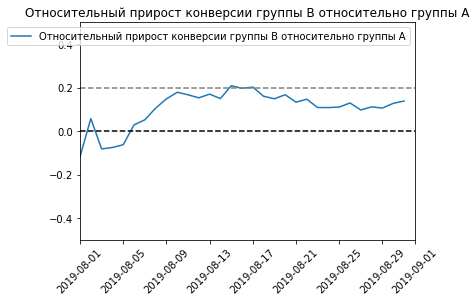

In [29]:
# считаем и строим график по относительному приросту конверсии группы  B к группе A
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), -0.5, 0.5])
plt.title('Относительный прирост конверсии группы B относительно группы A')
plt.xticks(rotation = 45)
plt.legend()

Группа В довольно таки быстро показала прирост конверсии и завиксировалась в районе 10%.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> 👍график и интерпретация корректны </div>

### Определение аномальных пользователей

In [30]:
# отсортируем пользователей по количеству заказов
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitor_id', as_index=False).agg({'transaction_id': 'nunique'})
    
ordersByUsers.columns = ['visitor_id', 'orders']
ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,visitor_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


Text(0.5, 1.0, 'Количество заказов по пользователям')

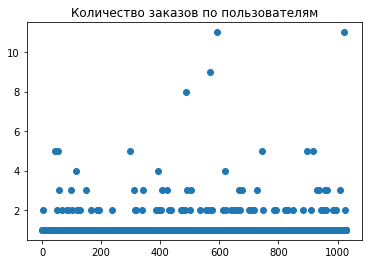

In [31]:
# строим точечны график по количеству заказов
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Количество заказов по пользователям')

Судя по точечному графику заказвших более 2-ух раз совсем мало.

In [32]:
# считаем персентели
print(np.percentile(ordersByUsers['orders'], [90, 95, 99])) 

[1. 2. 4.]


Не более 5% пользователей совершили более 2-ух заказов и не более 1% больше 4-ех заказов.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> 👍верно

In [33]:
# сортируем по выручке
orders.sort_values(by='revenue', ascending=False).head(10)

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
682,1216533772,4266935830,2019-08-29,78990,B
662,1811671147,4266935830,2019-08-29,78990,A
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A


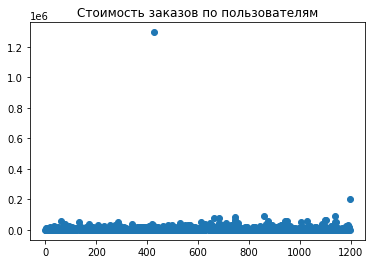

In [34]:
# строим точечный график по стоимости заказов
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.title('Стоимость заказов по пользователям')
plt.scatter(x_values, orders['revenue']) 

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Можно добавить еще один график, ограничив значения по оси Y.  Чтобы двух явных выбросов не было видно, а мы могли рассмотреть основную часть заказов. 

Есть вброс в районе 200 000 рублей и 1.2 млн.

In [35]:
# считаем персентели по строимости
np.percentile(orders['revenue'], [90, 95, 99])

array([18168. , 28000. , 58233.2])

Не более 5% пользователей заказывают свыше 28 000 рублей и не более 1% свыше 58 233 рублей.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> 👍верно

Разумнее всего взять пользователей соверших не более 2-ух заказов и с чеками не более 30 000 руб.

### Статистическая значимость

In [36]:
# расчитаем статистическую значимость различия конверсий неочищенных данных
# посчитаем сумму посещений по по датам и группам
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']


# посчитаем сумму выручки по по датам и пользователям
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]



In [37]:
# Создадим переменные ordersByUsersA и ordersByUsersB. 
# В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders']

In [38]:
# Создадим переменные sampleA и sampleB и посчитаем статистическую значимость коммулятивных конверсий разных групп.
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visitors'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)



print('p-value:', "{0:.5f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

print('Отношениение:', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.01679
Отношениение: 0.138


<div class="alert alert-danger">
<s><b>Комментарий ревьюера ❌:</b> плохая практика писать такие большие ячейки с кодом, это усложняет чтение и проверку кода. Разбей её, пожалуйста, на несколько логических блоков.
    
И внутри ячейки формируется таблица data - она лишняя. Дальше она используется только для извлечения столбца ['visitorsPerDateA/В'], но эта же информация у нас есть в таблице visitors. 

<div class="alert alert-info">
<b>Комментарий студента: </b> Таблицу удалила, ячейки поделила.  .</div> 

<div class="alert alert-success">
<b>2V Комментарий ревьюера ✔️✔️:</b> 😺 👍 супер! получилось отлично

p-value < 0.05, что говорит. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. Относительный выигрыш группы B равен 13.8%

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> 👍 проверка проведена верно

In [39]:
# расчитаем статистическую значимость различия среднего чека неочищенных данных
print('p-value:', '{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Отношениение:', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value: 0.729
Отношениение: 0.259


P-value больше 0.05, следовательно между группами нет статистически значимого различия по среднему чеку по "сырым" данным, несмотря на относительную разницу почти в 26%

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Более корректная формулировка:
P-value больше 0.05, следовательно между группами нет статистически значимого различия по среднему чеку по "сырым" данным, несмотря на относительную разницу почти в 26%</div>

<div class="alert alert-info">
<b>Комментарий студента:</b> Изменила, спасибо .</div> 

<div class="alert alert-success">
<b>2V Комментарий ревьюера ✔️✔️:</b> 😺 👍 теперь всё верно

### Статистическая значимость очищенных данных (без аномальных значений).

<div class="alert alert-danger">
<s><b>Комментарий ревьюера ❌:</b> здесь очень не хватает заголовка раздела и поясения, что будет происходить дальше

<div class="alert alert-info">
<b>Комментарий студента:</b> .</div> 

<div class="alert alert-success">
<b>2V Комментарий ревьюера ✔️✔️:</b> 😺 👍

In [40]:
# выведим аномальные значения
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] >= np.percentile(ordersByUsers['orders'], 95 )]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] >= np.percentile(ordersByUsers['orders'], 95 )]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 98 )]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
abnormalUsers


1099     148427295
18       199603092
23       237748145
37       249864742
42       366673373
           ...    
743     4133034833
562     4134830387
571     4186807279
499     4256040402
662     4266935830
Name: visitor_id, Length: 78, dtype: int64

<div class="alert alert-danger">
<s><b>Комментарий ревьюера ❌:</b> Не желательно использовать в коде константы (т.н.хардкодинг), это повышает риск ошибок при повторном использовании кода на других данных. Замени, пожалуйста, числа на код, их вычисляющий (перцентили).
    
И в качестве границ для отсечения аномальных заказов лучше использовать не просто числа, близкие к расчетным перцентилям, а конкретные перцентили (можно взять любой - и 98-й, и 90-й). Тогда в будущем при защите исследования будет проще ответить на вопрос, на основании чего выбрана граница.    

<div class="alert alert-info">
<b>Комментарий студента:</b> Исправлено.</div> 

<div class="alert alert-success">
<b>2V Комментарий ревьюера ✔️✔️:</b> 😺 👍 отлично, всё верно

In [41]:
# расчитаем статистическую значимость различия конверсий очищенных данных
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='B']['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print('p-value:','{0:.5f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Отношение:''{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value: 0.00878
Отношение:0.180


p-value стал еще меньше. А конверсия группы В стала выигрывать еще больше.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> 👍 проверка проведена верно

In [42]:
# расчитаем статистическую значимость различия среднего чека очищенных данных
print('p-value:',
    '{0:.5f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Отношение:',
    "{0:.5f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value: 0.88752
Отношение: 0.05307


p-value стал еще выше, а вот по среднему чеку группа В стала выигрывать намного меньше..

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> 👍 проверка проведена верно

**Вывод:** 
- Есть статистически значимые различия по конверсии между группами по «сырым», и по данным после фильтрации аномалий.
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий.
- Группа В почти по всем показателям лучше группы А и на графиках видно что значения стабилизировались. 

### Результат теста и принятие решения

- Есть статистически значимые различия по конверсии между группами по «сырым», и по данным после фильтрации аномалий.
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий.
- График различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около среднего значения.
- График различия среднего чека колеблется: он-то и позволил вам найти аномалии. Но колеблется он в плюсовых значениях.


**Тест можно остановить и признать его успешным. Группа B статистически значимо лучше группы A по обеим метрикам, а график конверсии говорит о фиксации результата.**

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> 👍 выводы полные и корректные

<div class="alert alert-danger">
<s><b>Комментарий ревьюера ❌:</b> Разве группа В статистически значимо лучше по обеим метрикам? Ведь проверка гипотез показала, что различия в среднем чеке не имеют статистической значимости.

<div class="alert alert-info">
<b>Комментарий студента:</b>  Исправлено.</div> 

## Вывод

1. Выгрузили 3 датасета, проверили на дубликаты, переименовали названия колонок для удобства, преобразовали тип данных, где это было необходимо. Пропусков не обнаружено. 
2. Провели приоритезацию гипотез 2-мя методами:
- по критерию ICE  впереди гипотезы: 8(Запустить акцию, дающую скидку на товар в день рождения),0(Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей),7(Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок). Влияние и уверенность в этих гипотезах высокие, а затраты средние.
- по критерию RICE на первых местах гипотезы: 7(Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок),2(Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа),0(Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей). На гипотезы 7,2 повлиял показатель охват пользователей. Гипотеза 7 имеет максимальный балл охвата, то есть она захватит большинство людей. 

На основании этих критериев в проиоритете гипотезы:
- 7(Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок),
- 0(Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей).

<div class="alert alert-danger">
<s><b>Комментарий ревьюера ❌:</b> здесь нужно заменить номера на полные формулировки гипотез</div></s>

<div class="alert alert-info">
<b>Комментарий студента:</b> Исправлено.</div> 

3. Провели анализ А/В теста
- Есть статистически значимые различия по конверсии между группами по «сырым», и по данным после фильтрации аномалий.
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий.
- График различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около среднего значения.
- График различия среднего чека колеблется: он-то и позволил вам найти аномалии. Но колеблется он в плюсовых значениях.

На основании анализа теста принято решение, что : **Тест можно остановить и признать его успешным. Группа B статистически значимо лучше группы A по конверсии, а так же график конверсии говорит о фиксации результата. В среднем чеке нет статичсчитческой значимости по различиям, хоть и средний чек группы B значительно выше среднего чека группы A.**

<div class="alert alert-warning">
<b>2V Комментарий ревьюера ⚠️⚠️:</b> Здесь всё ещё осталась погрешность в формулировке последнего предложения. Хотя у нас и получилась большая относительная разница в среднем чеке по очищенным данным, но это различие носит случайный характер, оно получилось на счет нескольких аномально больших заказов. Поэтому мы не можем сказать, что средний чек В значительно выше среднего чека группы А. Статистически они не отличаются.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> 👍 Здорово, что есть общие полные выводы. Они нуждаются в небольших корректировках.

<font size = "4">

**Комментарий ревьюера**

Оксана, спасибо за хороший проект. Расчетная часть и графики сделаны верно. Есть некоторые недочеты, которые я отметила красными комментариями. Исправь их, пожалуйста, чтобы я могла принять твою работу.
    
Если будет время, то желтые комментарии тоже можно применить прямо в этой работе или учесть их на будущее.
    

Если у тебя есть какие-то вопросы по комментариям или по проекту, напиши их также в своих комментариях, я постараюсь ответить.

<font size = "4">

**Комментарий ревьюера**

Оксана, спасибо за исправления. Я оставила несколько желтых комментариев с пожеланиями и корректировками. Если ты будешь публиковать свой проект в портфолио, то эти моменты также нужно исправить. 
    
Следующий проект будет связан с геоданными. До него ты можешь изучить/покрутить/посмотреть разные модули, которые смогут помочь в выполнении работы:  
— модуль folium для визуализации геоданных на карте — https://dev-gang.ru/article/interaktivnaja-vizualizacija-geo-dannyh-na-python-9yqzq8qlud/  
— модуль для сервиса Геокодер от Яндекса: https://pypi.org/project/yandex-geocoder/  
— модуль для сервиса замечательной российской компании Dadata: https://pypi.org/project/dadata/  
    
Так же в новом проекте будет задание по составлению презентации, для него ты можешь пройти новый бесплатный курс от Яндекс.Практикума — https://praktikum.yandex.ru/profile/visual-presentation/  